# NVIDIA Options

Using Dolt, I managed to get the .csv file but the format was strange where the delimiter is '|', not ',' and moreover, there's a lot of whitespace that I had to remove.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

In [35]:
df = pd.read_csv('options/nvda_option_chain.csv', delimiter='|',skiprows=1)

In [36]:
df.head()

,Unnamed: 0,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,theta,vega,rho,Unnamed: 14
0,+------------+------------+------------+------...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,2019-02-09,NVDA,2019-02-22,126.0,Call,22.85,23.60,0.6728,0.9038,0.0087,-0.1267,0.0495,0.0424,NaN
2,NaN,2019-02-09,NVDA,2019-02-22,126.0,Put,0.91,0.99,0.6765,-0.0972,0.0088,-0.1195,0.0499,-0.0059,NaN
3,NaN,2019-02-09,NVDA,2019-02-22,133.0,Call,17.10,17.50,0.6581,0.8187,0.0138,-0.1871,0.0765,0.0399,NaN
4,NaN,2019-02-09,NVDA,2019-02-22,133.0,Put,1.91,2.01,0.6522,-0.1794,0.0139,-0.1757,0.0757,-0.0102,NaN


In [37]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 14'])
df.head()


,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,theta,vega,rho
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-09,NVDA,2019-02-22,126.0,Call,22.85,23.60,0.6728,0.9038,0.0087,-0.1267,0.0495,0.0424
2,2019-02-09,NVDA,2019-02-22,126.0,Put,0.91,0.99,0.6765,-0.0972,0.0088,-0.1195,0.0499,-0.0059
3,2019-02-09,NVDA,2019-02-22,133.0,Call,17.10,17.50,0.6581,0.8187,0.0138,-0.1871,0.0765,0.0399
4,2019-02-09,NVDA,2019-02-22,133.0,Put,1.91,2.01,0.6522,-0.1794,0.0139,-0.1757,0.0757,-0.0102


In [38]:
df = df.dropna(axis=0, how='any')
df.head()

,date,act_symbol,expiration,strike,call_put,bid,ask,vol,delta,gamma,theta,vega,rho
1,2019-02-09,NVDA,2019-02-22,126.0,Call,22.85,23.60,0.6728,0.9038,0.0087,-0.1267,0.0495,0.0424
2,2019-02-09,NVDA,2019-02-22,126.0,Put,0.91,0.99,0.6765,-0.0972,0.0088,-0.1195,0.0499,-0.0059
3,2019-02-09,NVDA,2019-02-22,133.0,Call,17.10,17.50,0.6581,0.8187,0.0138,-0.1871,0.0765,0.0399
4,2019-02-09,NVDA,2019-02-22,133.0,Put,1.91,2.01,0.6522,-0.1794,0.0139,-0.1757,0.0757,-0.0102
5,2019-02-09,NVDA,2019-02-22,138.0,Call,13.35,13.65,0.6458,0.7368,0.0174,-0.2253,0.0947,0.0367


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21277 entries, 1 to 21277
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0    date         21277 non-null  object 
 1    act_symbol   21277 non-null  object 
 2    expiration   21277 non-null  object 
 3    strike       21277 non-null  float64
 4    call_put     21277 non-null  object 
 5    bid          21277 non-null  float64
 6    ask          21277 non-null  float64
 7    vol          21277 non-null  float64
 8    delta        21277 non-null  float64
 9    gamma        21277 non-null  float64
 10   theta        21277 non-null  float64
 11   vega         21277 non-null  float64
 12   rho          21277 non-null  float64
dtypes: float64(9), object(4)
memory usage: 2.3+ MB


In [39]:
len(df)

21277

In [44]:
df.columns

Index([' date       ', ' act_symbol ', ' expiration ', ' strike ',
       ' call_put ', ' bid   ', ' ask   ', ' vol    ', ' delta   ', ' gamma  ',
       ' theta   ', ' vega   ', ' rho     '],
      dtype='object')

In [45]:
df.columns = df.columns.str.strip()  # Strip leading and trailing spaces from column names

In [46]:
# Ensure 'date' and 'expiration' are in datetime format
df['date'] = pd.to_datetime(df['date'])
df['expiration'] = pd.to_datetime(df['expiration'])

# Calculate time to expiration in days
df['time_to_expiration'] = (df['expiration'] - df['date']).dt.days

In [54]:
df['call_put'].unique()

array([' Call     ', ' Put      '], dtype=object)

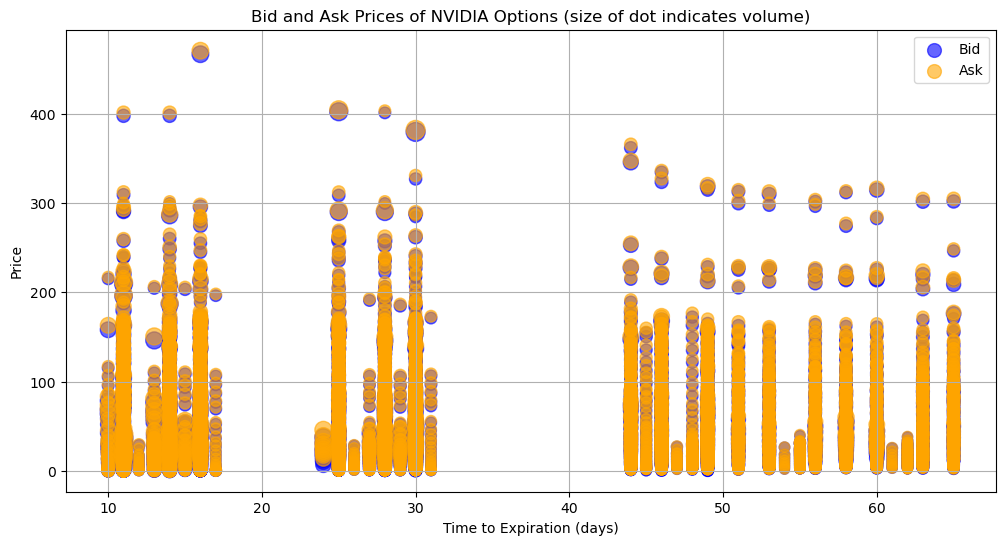

In [55]:
# Normalize volume for marker size (scale between 10 and 200 for better visibility)
df['volume_size'] = np.interp(df['vol'], (df['vol'].min(), df['vol'].max()), (10, 200))

# Get rid of white space
df['call_put'] = df['call_put'].str.strip()

# Filter data for call options (optional)
filtered_df = df[df['call_put'] == 'Call']

# Plot Bid and Ask with marker size based on volume
plt.figure(figsize=(12, 6))

# Plot Bid prices
plt.scatter(
    filtered_df['time_to_expiration'], 
    filtered_df['bid'], 
    s=filtered_df['volume_size'],  # Marker size by volume
    alpha=0.6, 
    color='blue', 
    label='Bid'
)

# Plot Ask prices
plt.scatter(
    filtered_df['time_to_expiration'], 
    filtered_df['ask'], 
    s=filtered_df['volume_size'],  # Marker size by volume
    alpha=0.6, 
    color='orange', 
    label='Ask'
)

# Add labels, title, legend, and grid
plt.xlabel('Time to Expiration (days)')
plt.ylabel('Price')
plt.title('Bid and Ask Prices of NVIDIA Options (size of dot indicates volume)')
plt.legend()
plt.grid()
plt.show()

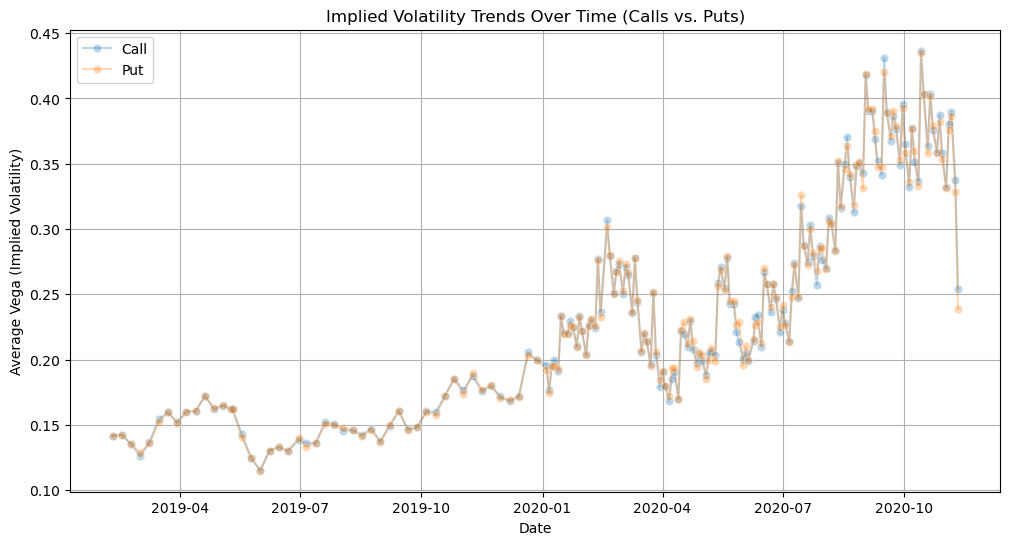

In [56]:
# Filter for relevant columns to simplify
df_filtered = df[['date', 'time_to_expiration', 'vega', 'call_put']].copy()

# Convert 'date' to datetime if not already done
df_filtered['date'] = pd.to_datetime(df_filtered['date'])

# Group by date and call_put to calculate mean vega
mean_vega = df_filtered.groupby(['date', 'call_put'])['vega'].mean().reset_index()

# Plot vega (change) over time for calls and puts
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_vega, x='date', y='vega', hue='call_put', marker='o',alpha=0.3)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Average Vega (Implied Volatility)')
plt.title('Implied Volatility Trends Over Time (Calls vs. Puts)')
plt.legend()
plt.grid()
plt.show()


In [57]:
# Calculate the bid-ask spread and add it as a new column
df['bid_ask_spread'] = df['ask'] - df['bid'] # just the difference

# Filter out negative or zero spreads (if any data issues exist)
df = df[df['bid_ask_spread'] > 0]

# Summary statistics for spreads
spread_summary = df['bid_ask_spread'].describe()
print("Bid-Ask Spread Summary:")
print(spread_summary)

Bid-Ask Spread Summary:
count    21275.000000
mean         1.460199
std          1.345431
min          0.010000
25%          0.360000
50%          1.000000
75%          2.100000
max          8.900000
Name: bid_ask_spread, dtype: float64


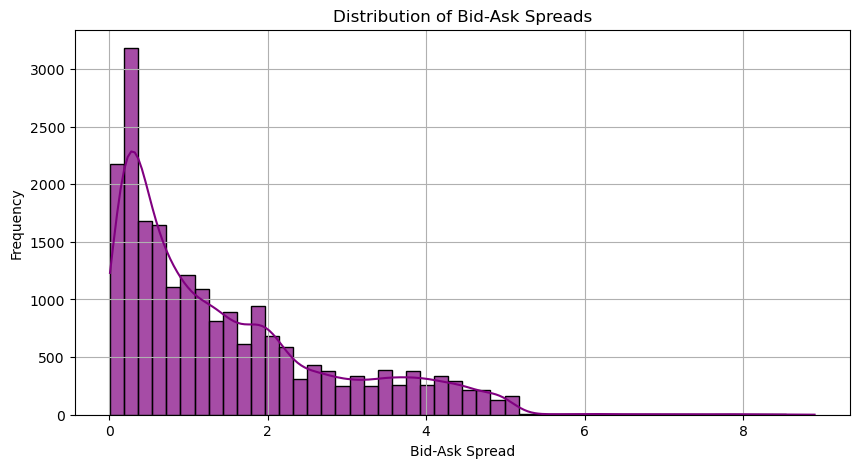

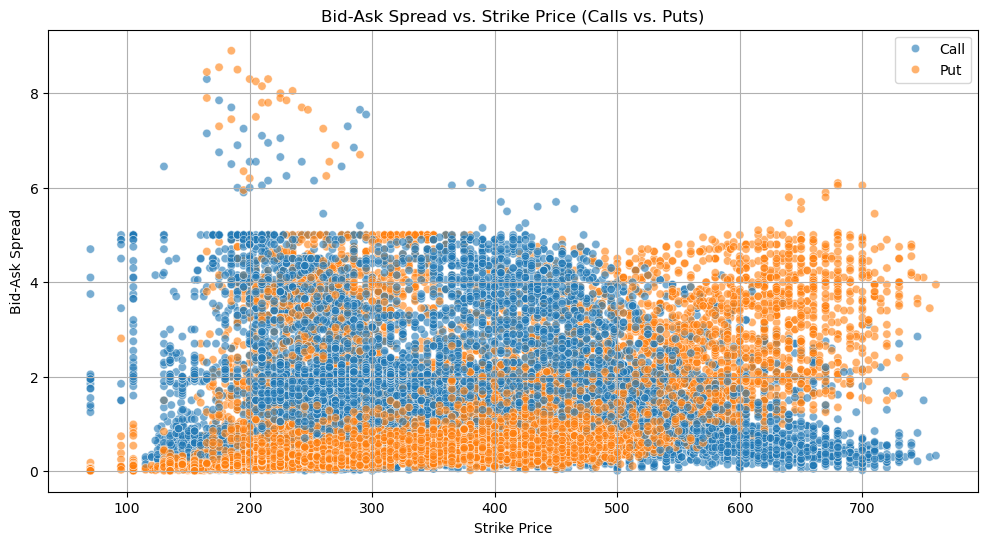

/var/folders/_d/c5j2kkcx3jvfgg9tymcv58yr0000gn/T/ipykernel_40973/1305995243.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is datetime type


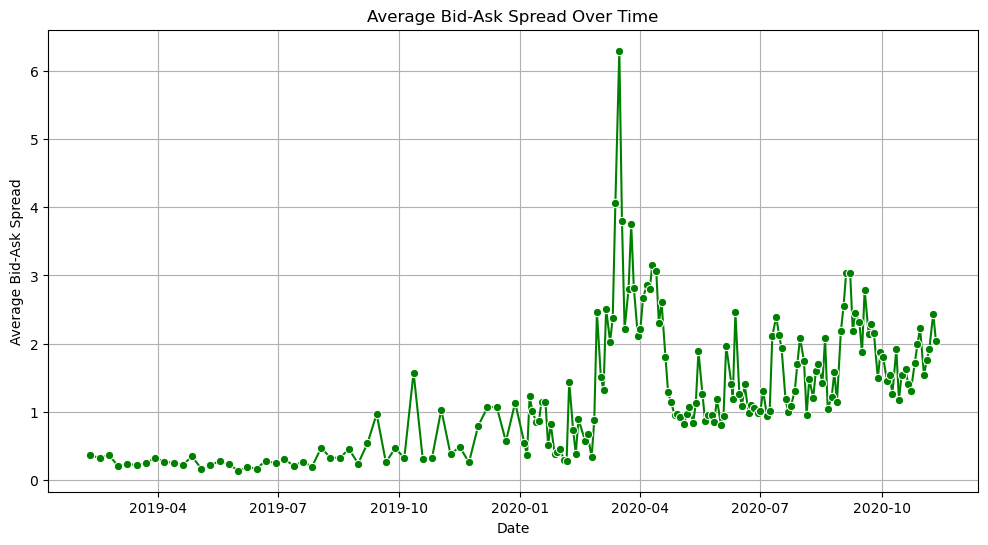

In [58]:
# plot 1: Spread distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['bid_ask_spread'], bins=50, kde=True, color='purple', alpha=0.7)
plt.xlabel('Bid-Ask Spread')
plt.ylabel('Frequency')
plt.title('Distribution of Bid-Ask Spreads')
plt.grid()
plt.show()

# plot 2: Spread by strike price
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df, 
    x='strike', 
    y='bid_ask_spread', 
    hue='call_put', 
    alpha=0.6
)
plt.xlabel('Strike Price')
plt.ylabel('Bid-Ask Spread')
plt.title('Bid-Ask Spread vs. Strike Price (Calls vs. Puts)')
plt.legend()
plt.grid()
plt.show()

# plot 3: Spread over time
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' is datetime type
mean_spread = df.groupby('date')['bid_ask_spread'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_spread, x='date', y='bid_ask_spread', color='green', marker='o')
plt.xlabel('Date')
plt.ylabel('Average Bid-Ask Spread')
plt.title('Average Bid-Ask Spread Over Time')
plt.grid()
plt.show()

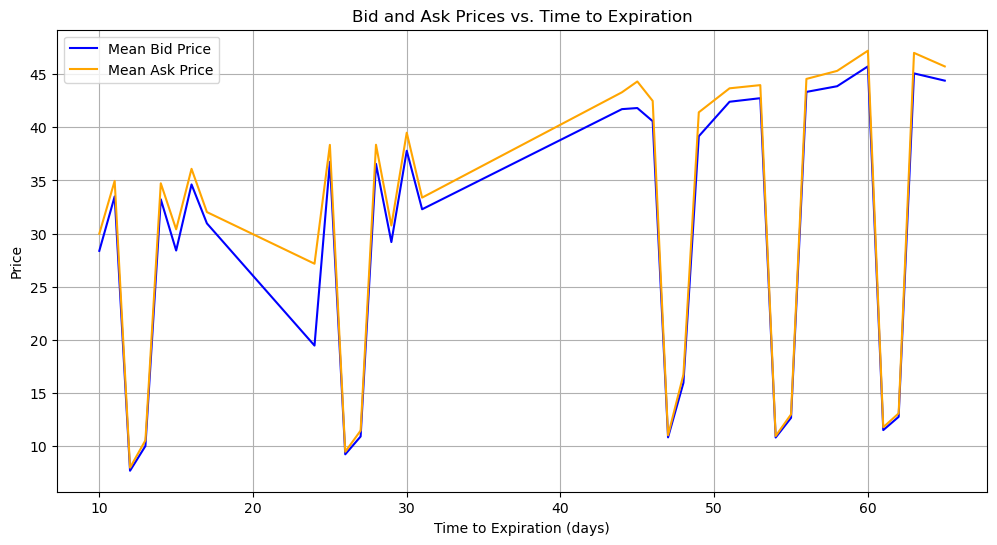

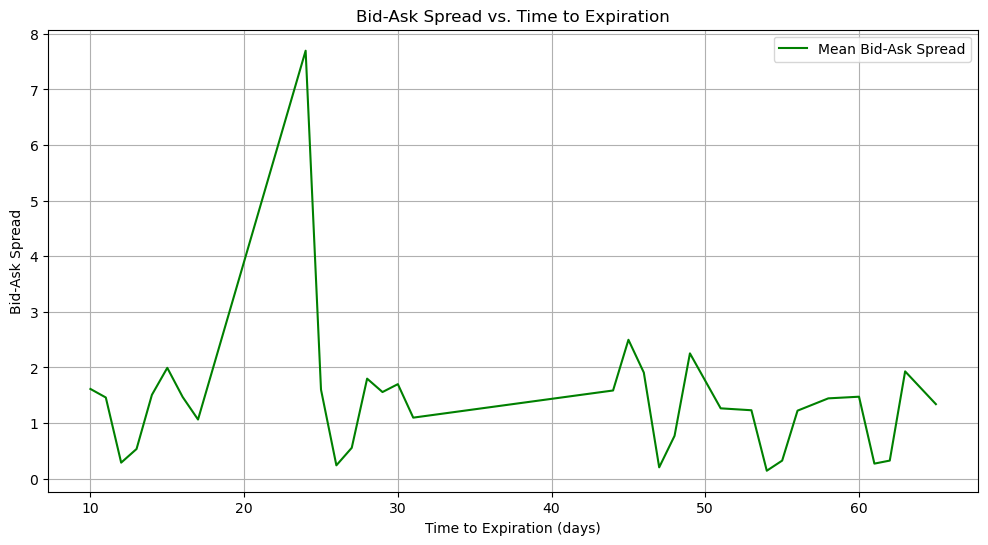

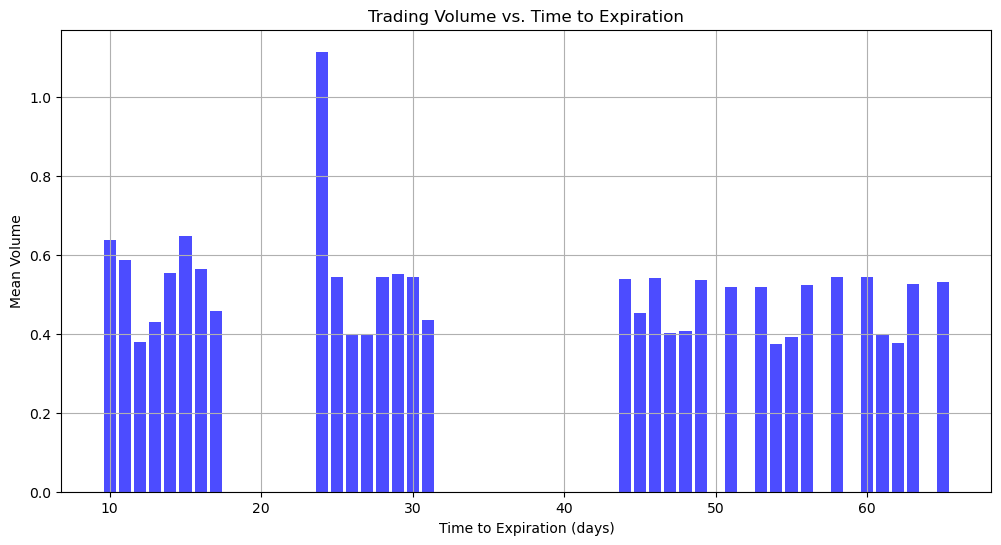

In [59]:
# Group data by 'time_to_expiration' and calculate mean bid, ask, and volume
expiration_dynamics = df.groupby('time_to_expiration').agg(
    mean_bid=('bid', 'mean'),
    mean_ask=('ask', 'mean'),
    mean_volume=('vol', 'mean'),
    spread=('bid_ask_spread', 'mean')
).reset_index()

# Plot 1: Bid and Ask Prices vs. Time to Expiration
plt.figure(figsize=(12, 6))
plt.plot(expiration_dynamics['time_to_expiration'], expiration_dynamics['mean_bid'], label='Mean Bid Price', color='blue')
plt.plot(expiration_dynamics['time_to_expiration'], expiration_dynamics['mean_ask'], label='Mean Ask Price', color='orange')
plt.xlabel('Time to Expiration (days)')
plt.ylabel('Price')
plt.title('Bid and Ask Prices vs. Time to Expiration')
plt.legend()
plt.grid()
plt.show()

# Plot 2: Bid-Ask Spread vs. Time to Expiration
plt.figure(figsize=(12, 6))
plt.plot(expiration_dynamics['time_to_expiration'], expiration_dynamics['spread'], label='Mean Bid-Ask Spread', color='green')
plt.xlabel('Time to Expiration (days)')
plt.ylabel('Bid-Ask Spread')
plt.title('Bid-Ask Spread vs. Time to Expiration')
plt.legend()
plt.grid()
plt.show()

# Plot 3: Volume vs. Time to Expiration
plt.figure(figsize=(12, 6))
plt.bar(expiration_dynamics['time_to_expiration'], expiration_dynamics['mean_volume'], color='blue', alpha=0.7)
plt.xlabel('Time to Expiration (days)')
plt.ylabel('Mean Volume')
plt.title('Trading Volume vs. Time to Expiration')
plt.grid()
plt.show()
